In [1]:
import sys
import math
import random
from collections import defaultdict
import matplotlib.pyplot as plt


# Sampling

In [2]:
def sampleOne(probs):
    z = 0
    for k, v in probs.items():
        z = z + v
    remaining = random.uniform(0, z)
    for k,v in probs.items():
        remaining = remaining - v
        if  remaining <= 0:
            return k


In [ ]:
p ={"A": 0.5, "B":0.25, "C":0.25}
mydic = defaultdict(lambda :0)
sample_num = 1000000
for i in range(sample_num):
    mydic[sampleOne(p)] +=1
for k, v in mydic.items():
    print(k, v)
# print (len(mydic))
for k, v in sorted(mydic.items()):
    print("p[%s]=%0.2f"%(k, v/sample_num))

## 棄却法

M = 2.66974399495
サンプル数: 100000 => 37850
実際の受理率  : 0.378500
理論的な受理率: 0.374568


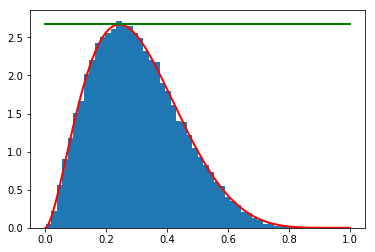

In [11]:
# ベータ乱数を受理・棄却法で生成
# 目標分布（ここではベータ分布）のpdfは既知とする
# 提案分布として一様分布を使用

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.stats import uniform, beta

np.random.seed()

# 目標分布f
f = beta(a=2.7, b=6.3).pdf

# 提案分布g
# 提案分布から乱数生成するためにgvも保持
gv = uniform
g = gv.pdf

# 分布の上限を指定する定数Mを設定
# ベータ分布のpdfの上限値を指定すればベータ分布をすべて覆える
# 最大値を求めるためにベータ分布のpdfにマイナスをつけて
# 最小値問題に帰着させる
xopt = scipy.optimize.fmin(lambda x: -f(x), 0.0, disp=False)
M = f(xopt)[0]
print ("M =", M)

# 受理・棄却法
Nsim = 100000

# 提案分布gからの乱数Yを生成
Y = gv.rvs(size=Nsim)

# 一様乱数UをNsim個生成
U = uniform.rvs(size=Nsim)

# Yから受理の条件を満たすサンプルXを残して残りを棄却
X = Y[U <= f(Y) / (M * g(Y))]
print ("サンプル数: %d => %d" % (len(Y), len(X)))
print ("実際の受理率  : %f" % (len(X) / float(len(Y))))
print ("理論的な受理率: %f" % (1.0 / M))

# 目標分布を描画
x = np.linspace(0.0, 1.0, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

# 提案分布（一様分布）を描画
y = M * uniform.pdf(x)
plt.plot(x, y, 'g-', lw=2)

# 受理した乱数の分布を描画
plt.hist(X, bins=50, normed=True)

plt.show()

In [3]:
ls = uniform.rvs(size=Nsim)

In [4]:
ls

array([ 0.95204869,  0.61180557,  0.14219899, ...,  0.69008349,
        0.08053099,  0.35148939])

In [12]:
X = Y[ls <= f(Y) / (M * g(Y))]

# モンテカルロ法

モンテカルロ法 (モンテカルロほう、Monte Carlo method, MC) とはシミュレーションや数値計算を乱数を用いて行う手法の総称。

## モンテカルロ法で円周率

一番簡単なモンテカルロ法の応用

1. アルゴリズム１
[https://mathtrain.jp/montecarlo](https://mathtrain.jp/montecarlo)

    半径１の1/4の円の面積は$\frac{\pi}{4}$, 横軸座標X縦軸座標をYが一様分布の確率変数とすれば、たくさんの点（サンプリング）を生成。点が円の中に入る確率は$\frac{\pi}{4}$なので、$\pi$=円の中に入った点の数割る点の総数。

2. アルゴリズム２

    - モンテカルロ積分
    [http://aidiary.hatenablog.com/entry/20140728/1406555863](http://aidiary.hatenablog.com/entry/20140728/1406555863)
    - 半径１の1/4 円の公式は$$y=\sqrt{1-x^2}、ｘ\in[0,1]$$この1/4の円の面積を積分で計算すると$$\int_{0}^{1}\sqrt{1-x^2}dx=\frac{\pi}{4}$$
    .この積分にモンテカルロ積分を適用すると$$(1-0)\int_{0}^{1}\sqrt{1-x^2}(\frac{1}{1-0})dx$$、ここで$\frac{1}{1-0}$は[0,1]の一様分布の確率密度関数である。なので、この積分を以下のように近似計算できる。
    $$\begin{align*}
    \frac{\pi}{4}&=(1-0)\int_{0}^{1}\sqrt{1-x^2}(\frac{1}{1-0})dx  \approx  \frac{1}{N}\sum\limits_i^N\sqrt{1-x_i^2}\\
    \pi&\approx \frac{4}{N}\sum\limits_{i=1}^N\sqrt{1-x_i^2}\end{align*}$$
    

In [183]:
ff = lambda x: np.sqrt(1-(x**2))

In [248]:
pi_1_array = []
pi_2_array = []
X = np.array([])
Y = np.array([])
step = 10000
for i in range(100):
    X = np.append(X, uniform.rvs(size = step))
    Y = np.append(Y, uniform.rvs(size = step))
    count_in_circle = 0
    for p0, p1 in zip(X, Y):
#         print(p0, p1)
        if (p0*p0 + p1*p1 <=1):
            count_in_circle +=1

#     print(len(in_pt))

    pi_1 = 4 * count_in_circle/ len(X)
    pi_2 = 4 * np.mean(ff(X))
    
    pi_1_array.append(pi_1)
    pi_2_array.append(pi_2)
    
#     print("method1: %f, error = %f"% (pi_1, np.pi - pi_1))
#     print("method2: %f, error = %f"% (pi_2, np.pi - pi_2))    
#     print("")

## $\pi$の値の推移

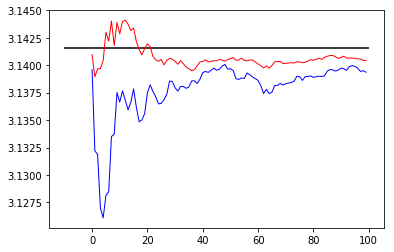

In [249]:
plt.plot(range(100), pi_1_array, lw=1,color='b')
plt.plot(range(100), pi_2_array, lw=1,color='r')
plt.hlines(np.pi, -10, 100 )
plt.show()

## 二乗誤差の推移

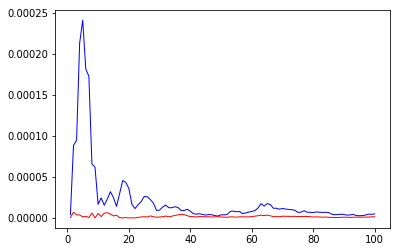

In [251]:
pi_1_square_err_array = [(p-np.pi)**2 for p in pi_1_array]
pi_2_square_err_array = [(p-np.pi)**2 for p in pi_2_array]
plt.plot(range(1,101), pi_1_square_err_array, lw=1,color='b')
plt.plot(range(1,101), pi_2_square_err_array, lw=1,color='r')

plt.show()
